In [1]:
## DATA OVERVIEW

import pandas as pd
import plotly
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

%matplotlib inline

# Load dataset
apps = pd.read_csv('/content/apps.csv')
print(apps.info(), '\n', apps.describe(), '\n')
apps.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None 
          Unnamed: 0       Rating       Reviews         Size
count   9659.000000  8196.000000  9.659000e

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
## DATA CLEANING

# Drop duplicate apps
apps2 = apps.drop_duplicates(subset='App')
apps2 = apps2.drop(['Unnamed: 0', 'Last Updated', 'Current Ver', 'Android Ver', 'Genres'], axis=1)

# Cleaning up values
chars_to_remove = [',', '+', '$']
cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps2[col] = apps2[col].apply(lambda x: x.replace(char, ''))

# Correcting data types
apps2['Installs'] = apps2['Installs'].astype(float)
apps2['Installs'] = np.log(apps2['Installs'])
apps2['Price'] = apps2['Price'].astype(float)
apps2['Size'].fillna(apps2['Size'].mean(), inplace=True)
apps2['Rating'].fillna(apps2['Rating'].mean(), inplace=True)
print(apps2.info(), '\n')

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
num_genres = len(apps['Genres'].unique())
print('Number of Categories and Genres = {}, {}'.format(num_categories, num_genres), '\n')
apps2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 754.6+ KB
None 

Number of Categories and Genres = 33, 118 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,9.210340,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,13.122363,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15.424948,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,17.727534,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,11.512925,Free,0.0,Everyone


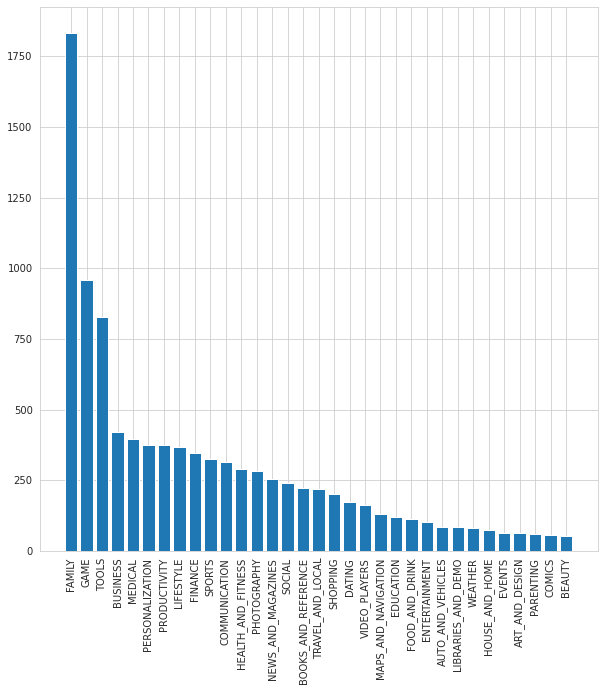

In [3]:
## EDA VISUALIZATION 1

sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.clf()

# Categories dominating the market. 
num_apps_in_category = apps2['Category'].value_counts()
plt.bar(num_apps_in_category.index, num_apps_in_category)
plt.tick_params(axis='x', labelrotation=90)


Text(0.5, 1.0, 'App Popularity across Types')

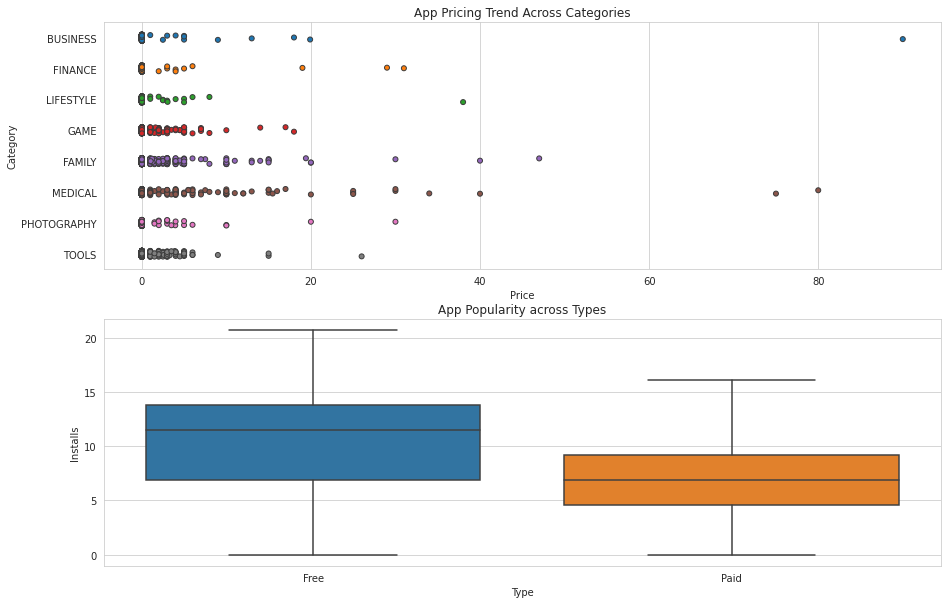

In [4]:
## EDA VISUALIZATION 2

plt.figure(figsize=(15,10))
plt.clf()

# Select the most popular app categories
popular_app_cats = apps2[apps2['Category'].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
popular_app_cats = popular_app_cats[popular_app_cats['Price']<100]
paid_apps = apps2[apps2['Type']=='Paid']
paid_apps = paid_apps[paid_apps['Price']<100]

plt.subplot(2,1,1)
g1 = sns.stripplot(x=popular_app_cats['Price'], y=popular_app_cats['Category'], jitter=True, linewidth=1)
g1.set_title('App Pricing Trend Across Categories')
plt.subplot(2,1,2)
g2 = sns.boxplot(x=popular_app_cats['Type'], y=popular_app_cats['Installs'])
g2.set_title('App Popularity across Types')


<Figure size 432x288 with 0 Axes>

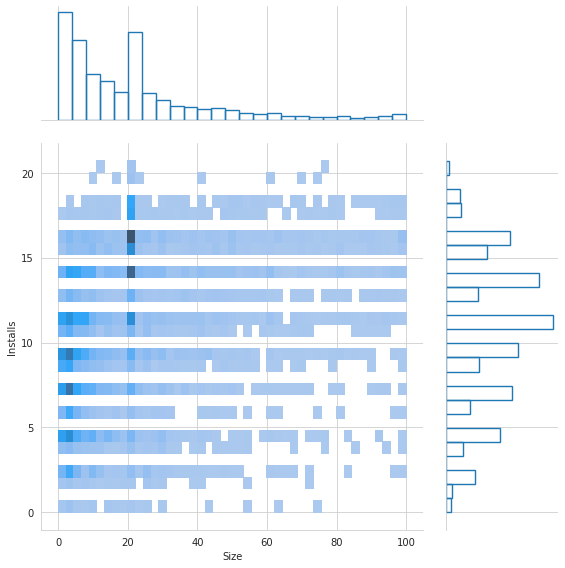

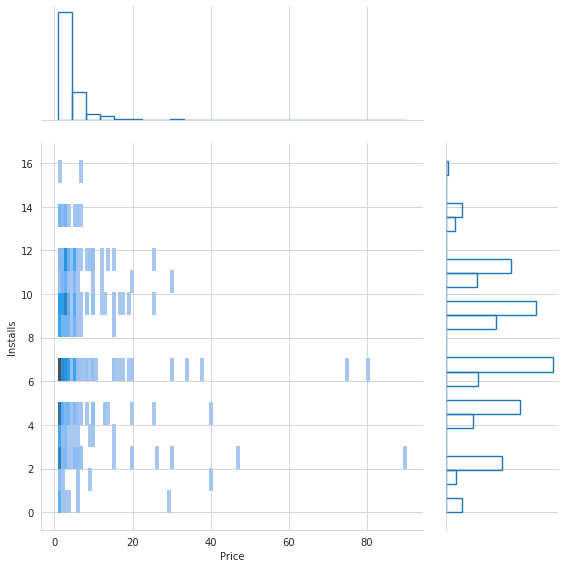

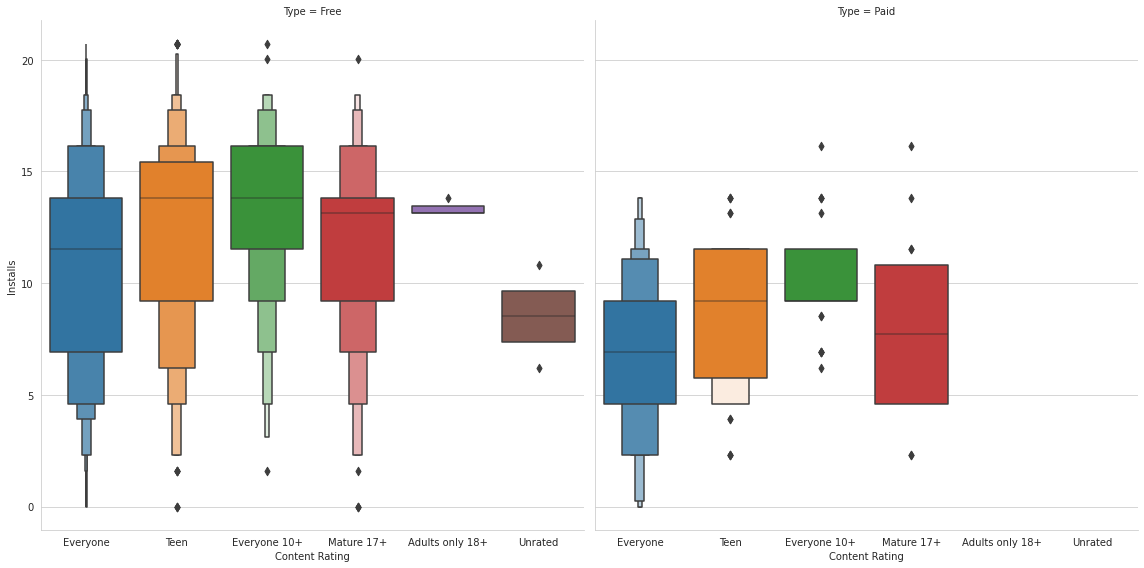

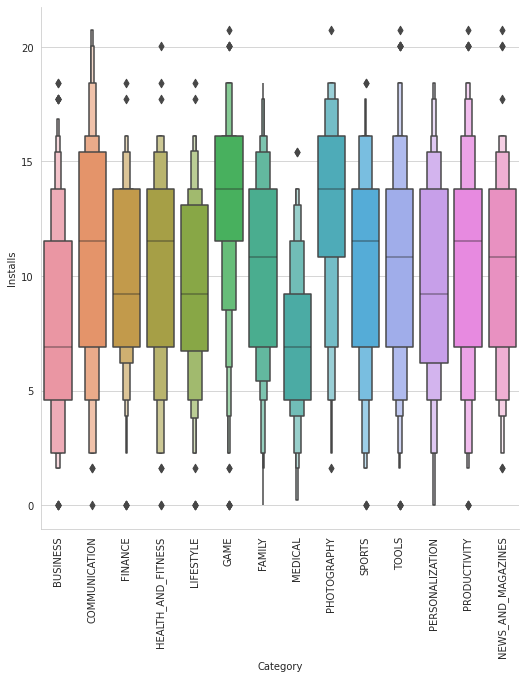

In [5]:
## EDA VISUALIZATION 3

plt.clf()

# Subset and visualize large categories and paid apps against ratings
large_categories = apps2.groupby('Category').filter(lambda x: len(x) >= 250)
sns.jointplot(x=large_categories['Size'], y=large_categories['Installs'], kind='hist', height=8, marginal_kws=dict(bins=25, fill=False), ratio=3)
sns.jointplot(x=paid_apps['Price'], y=paid_apps['Installs'], kind='hist', height=8, marginal_kws=dict(bins=25, fill=False), ratio=3)

# Comparing ratings across content rating and categories 
sns.catplot(x='Content Rating', y='Installs', col='Type', data=apps2, kind='boxen', height=8)
sns.catplot(x='Category', y='Installs', data=large_categories, height=8, kind='boxen')
plt.tick_params(axis='x', labelrotation=90)


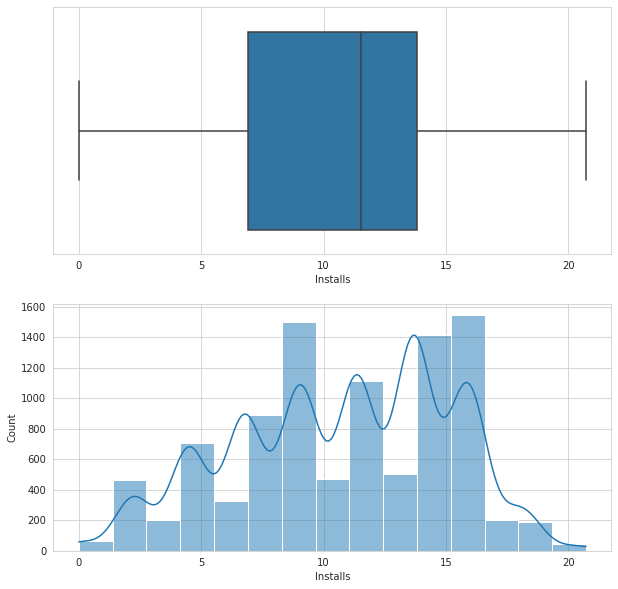

In [6]:
## EDA VISUALIZATION 4

plt.figure(figsize=(10,10))
plt.clf()

# Average rating of apps
avg_app_rating = apps2['Installs'].mean()

# Distribution of ratings
plt.subplot(2,1,1)
g3 = sns.boxplot(x=apps2['Installs'])
plt.subplot(2,1,2)
g4 = sns.histplot(x=apps2['Installs'], bins=15, kde=True)
g4.axvline(avg_app_rating, color='black', linestyle='--')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

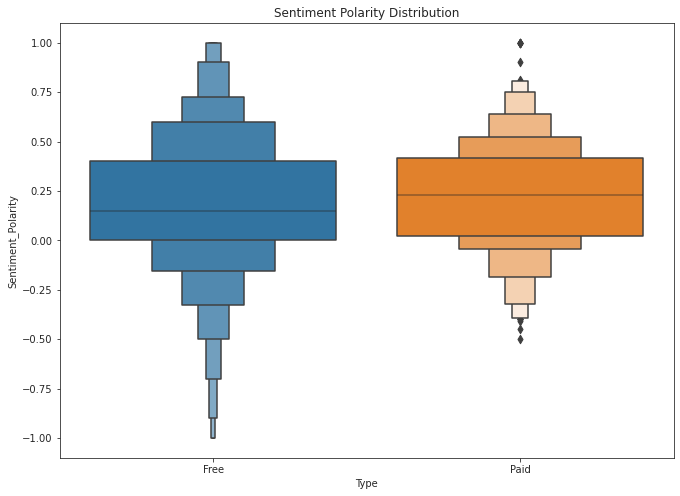

In [7]:
## EDA VISUALIZATION 5

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Merge reviews dataset
reviews_df = pd.read_csv('/content/user_reviews.csv')
merged_df = apps2.merge(reviews_df, how='right')
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

# User review sentiment polarity for paid vs. free apps
ax = sns.boxenplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')


In [8]:
## MODEL

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning for the final dataset
merged_df2 = pd.get_dummies(merged_df, columns=['Category', 'Type', 'Content Rating', 'Sentiment'])
merged_df3 = merged_df2.drop('Review', axis=1)
data = merged_df2.groupby('App', as_index=False).mean()
apps3 = pd.get_dummies(apps2, columns=['Category', 'Type', 'Content Rating'])
data2 = data.append(apps3)
data2['Sentiment_Negative'].fillna(0.33, inplace=True)
data2['Sentiment_Positive'].fillna(0.33, inplace=True)
data2['Sentiment_Neutral'].fillna(0.33, inplace=True)
data2['Sentiment_Polarity'].fillna(0, inplace=True)
data2['Sentiment_Subjectivity'].fillna(0.5, inplace=True)
final_data = data2.dropna(subset=['Rating', 'Reviews', 'Price', 'Installs', 'Size'])
final_data = final_data.drop(['App', 'Content Rating_Unrated'], axis=1)
final_data['Installs'].replace([np.inf, -np.inf], np.nan, inplace=True)
final_data['Installs'].replace(np.nan, 11, inplace=True)

# Setting up models and cross-validating
models = {'GBM':GradientBoostingRegressor(n_estimators=100), 'RF':RandomForestRegressor()}
cv_scores = []
X = final_data.drop('Installs', axis=1)
y = final_data['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=199)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
kf = KFold(n_splits=10, shuffle=True, random_state=199)
for model in models.values():
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
  cv_scores.append(cv_results)


Selected Model Score:  0.9379669860380963 



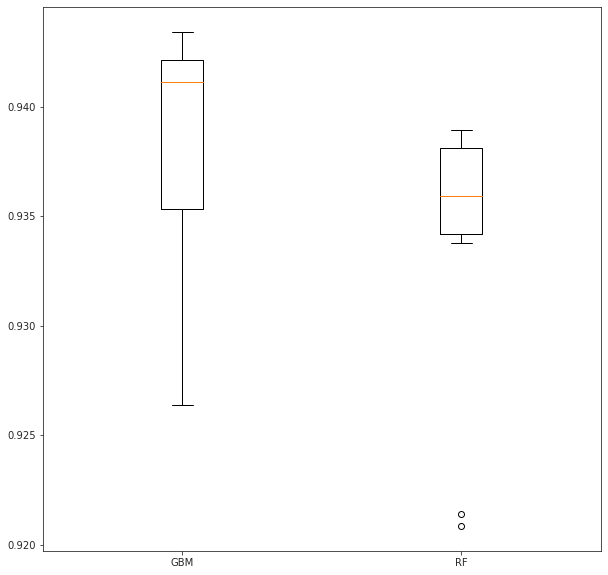

In [12]:
## MODEL EVALUATION

# Plot model performance
plt.figure(figsize=(10,10))
plt.clf()
plt.boxplot(cv_scores, labels=models.keys())

# Hyperparameters already tuned by hand
GBM = GradientBoostingRegressor(n_estimators=100)
GBM.fit(X_train_scaled, y_train)
y_pred = GBM.predict(X_test)
score = GBM.score(X_test_scaled, y_test)
print('Selected Model Score: ', score, '\n')
